#**Algoritmos de clasificación**

#### Andrés Alejandro Guzmán González - A01633819

*Instrucciones:* Con la base de datos "iris-data". Explica los algoritmos que utilizan los métodos de clasificación: **regresión logística, Bayes y análisis de discriminate.** De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regresión Logística

La regresión logística es utilizada para predecir la probabilidad de ocurrencia de un evento en función de una o más variables independientes. A pesar de su nombre, no se utiliza para realizar regresión en el sentido tradicional de predecir valores numéricos, sino que se aplica en problemas de clasificación.

$P\left(y=1∣X=x\right)=1+e^{-\left(β_0+β_1x\right)}$



Exactitud:  1.0


<Axes: >

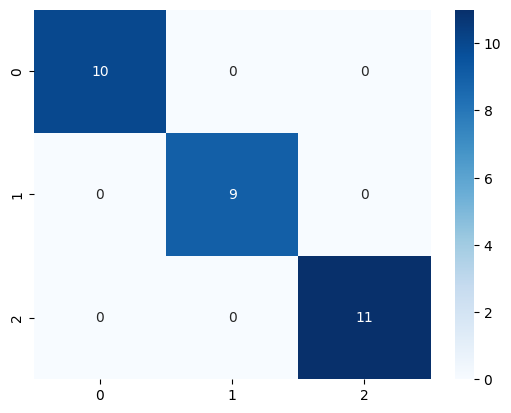

In [ ]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_predict = logistic.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_predict)
confusion_logreg = confusion_matrix(y_test, y_predict)

print("Exactitud: ",accuracy_logreg)
sns.heatmap(confusion_logreg, annot=True, cmap='Blues')


## Bayes

Este algoritmo de clasificación asume que todas las características o probabilidades son independientes y que la distribución de estas modela como una distribución Gaussiana. Básicamente, nos permite calcular cuánto más o menos probable es que ocurra un evento en lugar de otro considerando los datos.


$P\left(B∣A_i\right)=\frac{P\left(B∣A_i\right)P\left(A_i\right)}{\sum _{k=1}^n\:P\left(B∣A_k\right)P\left(A_k\right)}$

Exactitud:  1.0


<Axes: >

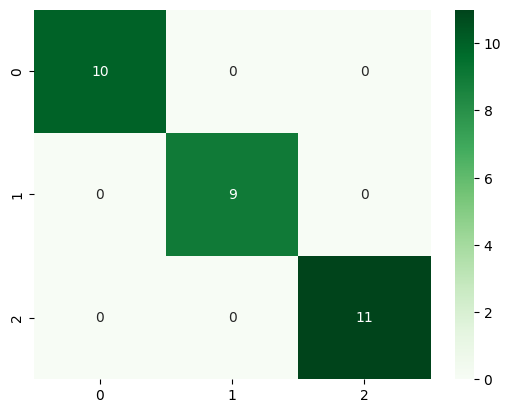

In [ ]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
confusion_bayes = confusion_matrix(y_test, y_pred_bayes)

print("Exactitud: ",accuracy_bayes)
sns.heatmap(confusion_bayes, annot=True, cmap='Greens')

## Análisis del Discriminante

Este algoritmo de clasificación divide en grupos las variables del Data Frame a través de sus atributos medibles. El objetivo de este algoritmo es mañimizar la separación de grupos y minimizar la variabilidad en cada grupo.

Exactitud:  1.0


<Axes: >

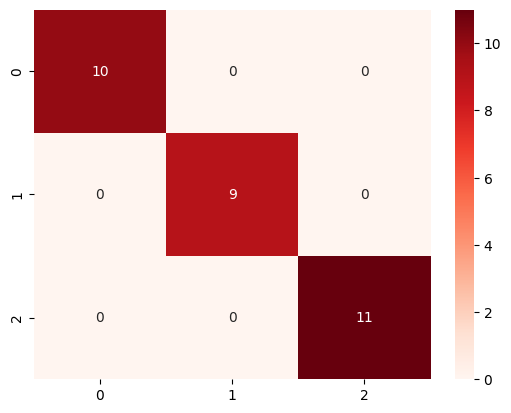

In [ ]:
disc = LinearDiscriminantAnalysis()
disc.fit(X_train, y_train)
y_pred_disc = disc.predict(X_test)
accuracy_disc = accuracy_score(y_test, y_pred_disc)
confusion_disc = confusion_matrix(y_test, y_pred_disc)

print("Exactitud: ",accuracy_disc)
sns.heatmap(confusion_bayes, annot=True, cmap='Reds')

#### **¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?**

Con este conjunto de datos "iris", pude identificar que los modelos de regresión logística, Naive Bayes y análisis discriminante, lograron el mismo resultados. La precisión y la matriz de confusión fueron iguales para los tres. Esto muestra que todos estos modelos funcionan más o menos igual de bien para clasificar en este caso.

Creo que esta igualdad de resultados podría deberse a que los datos tienen cierta estructura que beneficia a cada modelo de manera similar. Además, como el conjunto de datos no es muy grande, es posible que las diferencias en el rendimiento no sean muy evidentes.

Cuando todos los modelos logran lo mismo, podría significar que todos están capturando las mismas características de los datos. Así que, en este caso, no parece haber uno que sea mejor que los demás.






